In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
from sklearn.preprocessing import normalize

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### 1. *k*-means on a Randomly Generated Dataset
30 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [2]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

In [3]:
centers = [[-2, 2], [2, -2]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-2,-2],[-2,-2]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [4]:
def distance(X, centers):
    return np.sqrt(np.square(X - centers).sum(axis=1))
def assign_members(x1, x2, centers):
    X = np.array([x1, x2]).T
    centers = np.array(centers)
    class_of_points = np.zeros(shape=(X.shape[0],centers.shape[0]))
    colors = np.empty(shape=(X.shape[0],), dtype='object')
    for x in range(X.shape[0]):
        d = distance(X[x], centers)
        c = d.argmin()
        colors[x] = colors_map[c]
        class_of_points[x,c] = 1
    return colors, class_of_points
a = [-2, 0, 2, 1]
b = [2, -2, -2, 1]
c, cp = assign_members(a,b, centers)
cp

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

#### Define a function that updates the centroid of each cluster

In the `update_centers` function you will take along with both features the class of points as parameter and returns the updated centers

In [5]:
def update_centers(x1, x2, class_of_points):
    centers = np.zeros(shape=(class_of_points.shape[1],2))
    cp = class_of_points.argmax(axis=1).flatten()
    x1 = np.array(x1)
    x2 = np.array(x2)
    for c in range(centers.shape[0]):
        idx = np.where(cp == c)[0]
        centers[c,0] = np.mean(x1[idx])
        centers[c,1] = np.mean(x2[idx])
    return centers
update_centers(a,b, cp)

array([[-0.5,  1.5],
       [ 1. , -2. ]])

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [6]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

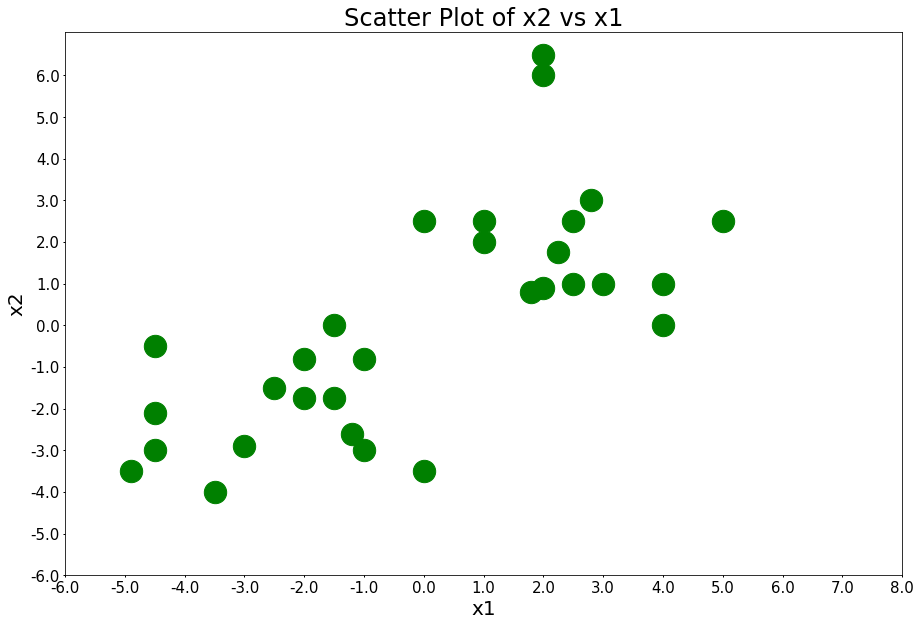

In [7]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

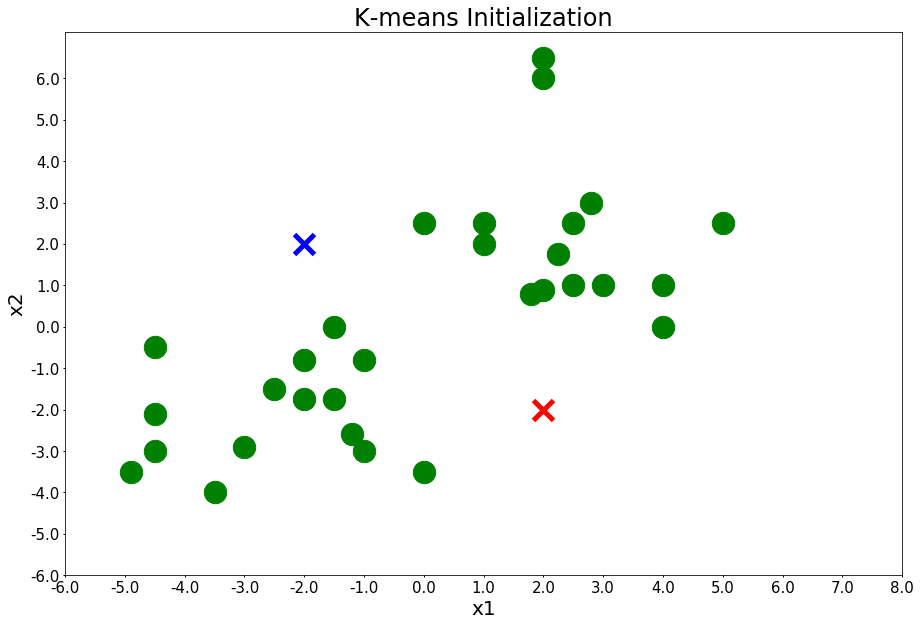

In [8]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   
The last two plots should look like this after running it for 4 iterations after which it converges 

![Cluster Assignment](ClusterAssignment.PNG)
![Centroid Update](CenterUpdate.PNG)


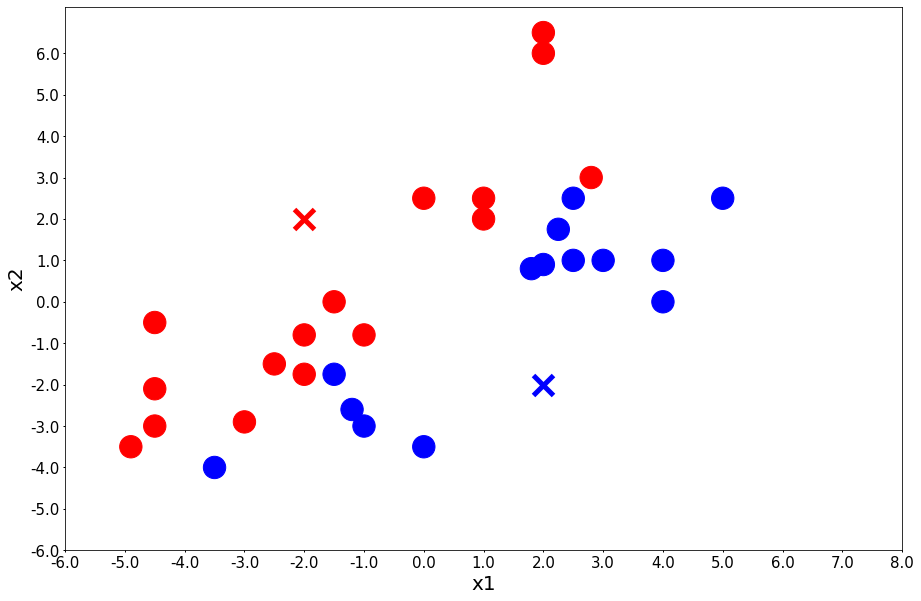

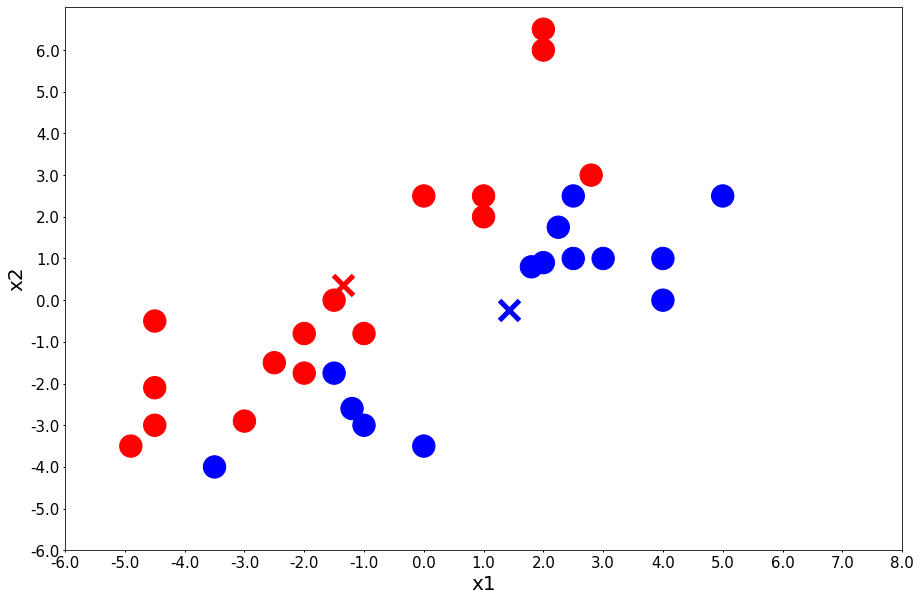

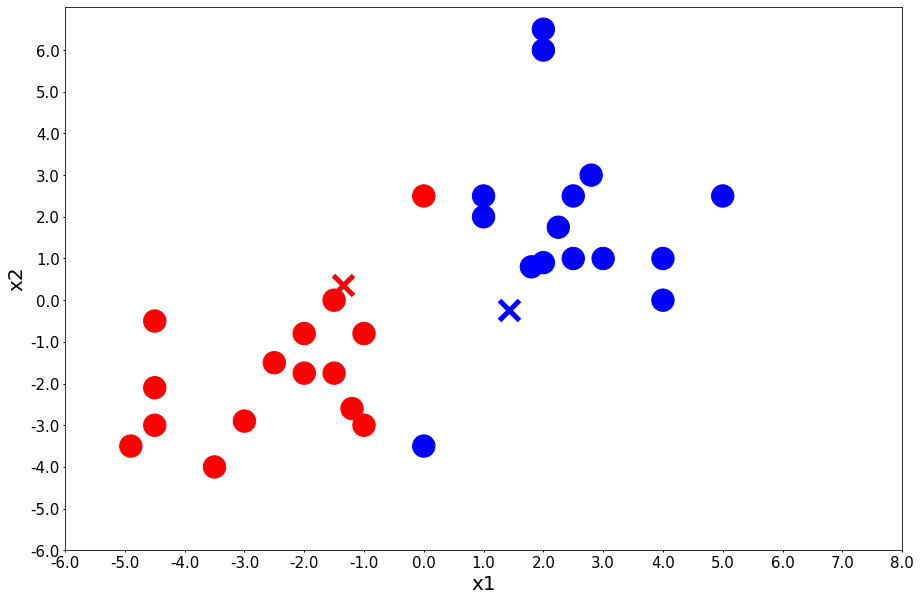

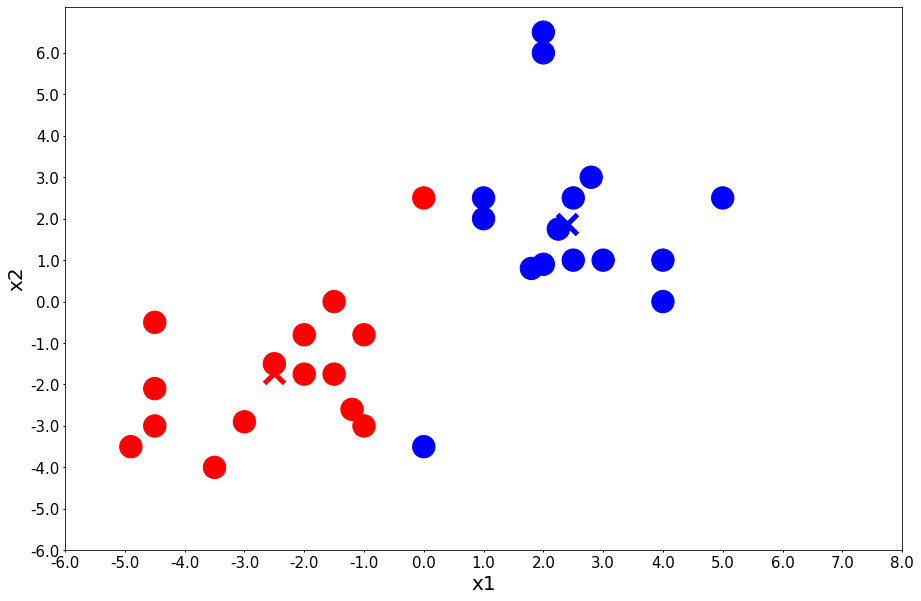

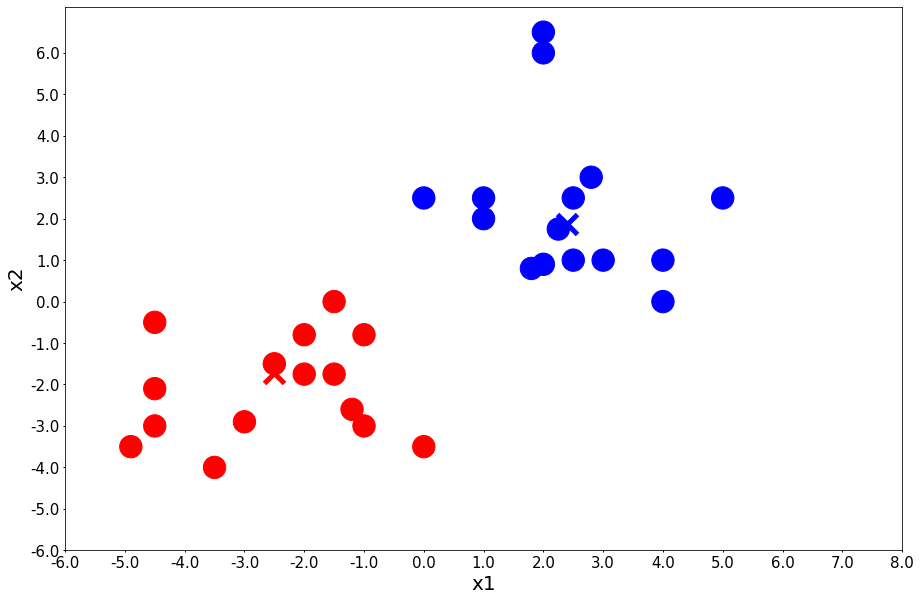

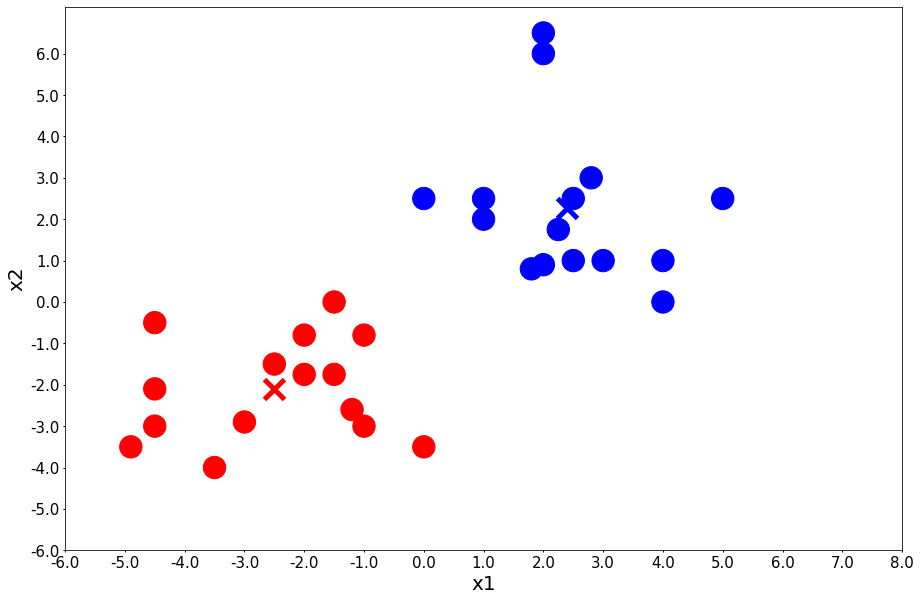

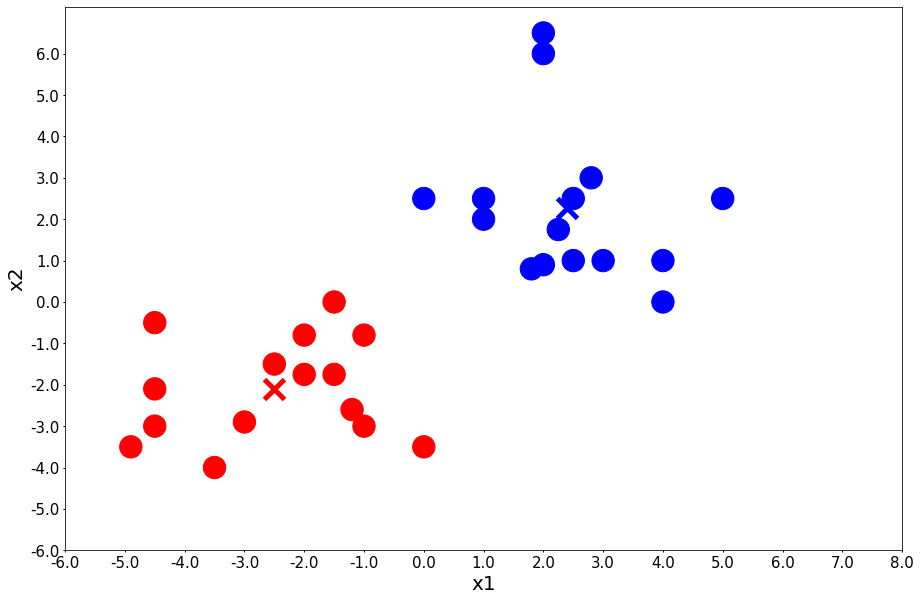

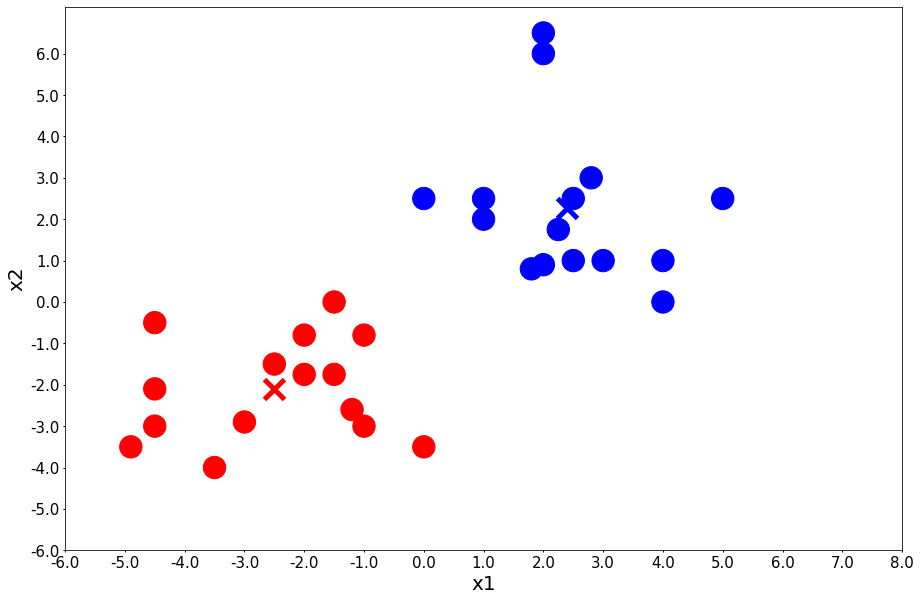

In [9]:
centers = [[2, -2], [-2, 2]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    colors, class_of_points = assign_members(x1, x2, centers)
    plot_points(list(centers), colors)    
    centers = update_centers(x1, x2, class_of_points) 
    plot_points(list(centers), colors)    
    continue


### 2. *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [10]:
customer_segmentation = pd.read_csv('customer_segmentation.csv')
customer_segmentation.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [11]:
customer_segmentation.drop(columns=['Address', 'Customer Id'], inplace=True)
customer_segmentation.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:** I checked and verified that there are 850 customer id and 850 entry in table. So that wasn't useful and Address was also no useful to us as it was incrementally assigned to each customer. For clustering or any analysis it would be useless

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [12]:
customer_segmentation.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [13]:
customer_segmentation['Defaulted'] = customer_segmentation['Defaulted'].ffill()
print(customer_segmentation.isna().sum())
customer_segmentation.head()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** I have forward filled the data because removing them would cause loss of 150 observations for other columns. Since the missing values were only for one binary column, 'Defaulted' I choose to fill them using forward fill method.

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [14]:
# Your code goes here
X = normalize(customer_segmentation) # Normalized numpy array, used later in the visualization step

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 3 clusters here.
Initailize the `n_init` parameter to equal 12

In [15]:
# Your code goes here
# Initialize
kmn = KMeans(3, n_init=12)
# Fit
kmn.fit(X)
# Print labels
labels = kmn.predict(X)
print(labels)

[1 0 0 1 0 0 0 0 2 0 0 1 1 2 2 2 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1
 2 1 0 2 0 2 0 2 0 2 1 1 0 0 2 2 1 0 2 1 1 0 1 0 1 0 0 1 0 0 1 2 2 0 0 0 0
 1 2 1 1 0 1 0 0 0 1 1 1 2 2 1 2 0 1 1 2 1 1 1 1 2 1 2 0 0 1 2 2 1 2 0 0 0
 2 0 2 1 1 2 0 0 1 2 0 1 0 0 0 0 1 2 1 1 0 1 1 2 1 0 2 1 2 1 2 0 2 0 2 0 1
 0 1 1 2 1 2 0 1 0 0 2 0 1 2 0 0 2 1 0 1 1 1 0 2 1 0 1 2 0 1 1 0 1 1 1 0 2
 0 1 1 1 0 2 2 0 1 0 1 2 1 0 1 0 1 2 1 1 1 1 0 0 1 1 0 0 0 1 2 0 0 0 0 2 0
 1 1 1 1 0 1 2 1 1 2 0 2 0 1 1 2 0 0 1 1 1 1 1 0 0 0 0 2 1 0 1 2 0 2 1 1 1
 1 1 0 0 0 0 1 0 0 1 1 2 1 1 1 1 1 2 0 1 1 1 0 0 2 0 1 0 0 0 0 1 1 1 2 0 2
 2 1 0 0 0 0 1 1 2 0 1 2 2 1 0 2 1 1 1 1 1 2 1 1 0 1 0 1 1 0 2 1 0 1 0 0 2
 1 1 2 1 0 2 1 1 0 1 2 0 1 2 0 1 1 0 1 1 1 1 1 0 1 1 2 0 2 1 1 0 2 0 0 0 0
 1 1 0 1 2 2 2 1 1 2 1 1 1 2 0 1 0 2 1 1 2 0 1 2 2 0 1 0 1 1 2 1 2 2 2 1 1
 1 0 1 0 0 0 2 0 1 0 2 1 1 0 0 2 1 0 1 1 2 1 1 0 2 2 2 0 1 1 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 1 1 1 0 1 2 1 1 0 1 0 2 2 0 2 0 1 0 1 0 1 1 0 1 1 0 1 1 2 0
 2 0 2 1 1 1 0 2 1 2 0 1 

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  
1. Using the Elbow method of change in variance to check
2. Using Silhoutte Method

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [16]:
# Your code goes here
customer_segmentation['Labels'] = labels
customer_segmentation.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

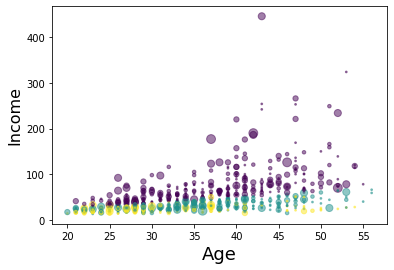

In [17]:
labels = customer_segmentation['Labels']
area = np.pi * ( customer_segmentation['Edu'])**2  
plt.scatter(customer_segmentation['Age'], customer_segmentation['Income'], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 3 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [18]:
# Your code goes here
grouped = customer_segmentation.groupby('Labels')
print(grouped['Income'].mean())
print(grouped['Age'].mean())
print(grouped['Edu'].mean())
print(grouped['DebtIncomeRatio'].median())

Labels
0    79.190164
1    30.682927
2    23.857955
Name: Income, dtype: float64
Labels
0    37.596721
1    34.631436
2    31.414773
Name: Age, dtype: float64
Labels
0    1.944262
1    1.577236
2    1.585227
Name: Edu, dtype: float64
Labels
0     8.5
1     6.4
2    16.1
Name: DebtIncomeRatio, dtype: float64


Characteristics for each cluster  
1. Mean Income is high for group with higher mean Age
2. Mean Income is also higher to people with higher level of education
3. People with lowest age and income and 2 times more in debt than any other cluster/group

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. K-Means can be computationally faster than Hierarchal Clustering

2. Easy and simple to implement

**Disadvantages**
1. Have to specify a value of K which isn't ideal
2. Different initial clusters can result in non ideal clusters and non deterministic clusters.

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [19]:
### Code here
customer_shopping = pd.read_csv('customers_shopping.csv')
print(customer_shopping.isna().sum())
print(customer_shopping.shape)
customer_shopping = pd.get_dummies(customer_shopping)
customer_shopping.drop(columns=['CustomerID'], inplace=True)
customer_shopping.head()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
(200, 5)


,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


**Dendrogram** is used to visualize the history of groupings and figure out the optimal number of clusters.

**Question:** Draw **two dendograms using two different linkage methods**. *Comment on the cause of differences between the two*.

Pick **one** of the above which you find to be the best. Mention the **number of clusters** and justify your answer.

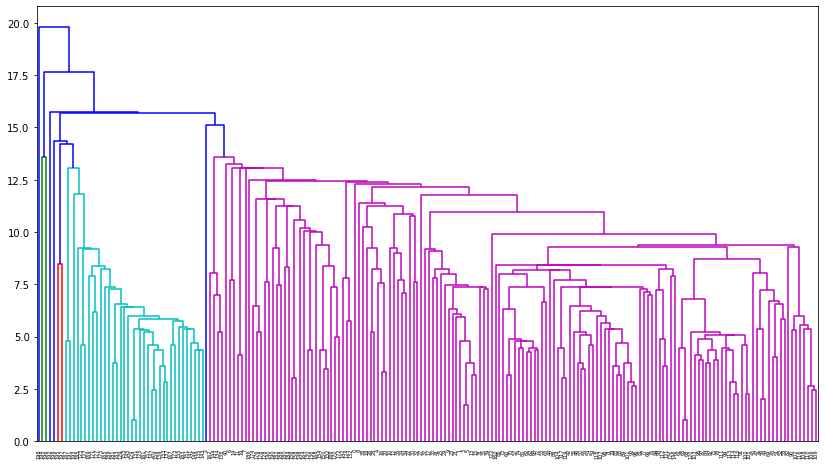

In [20]:
#### Draw dendrogram here
Z = sch.linkage(customer_shopping, 'single')
plt.figure(figsize=(14,8))
dn = sch.dendrogram(Z)

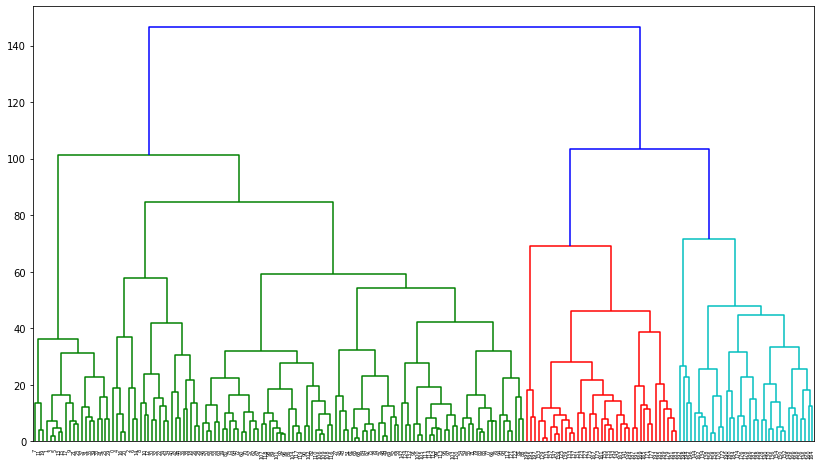

In [21]:
#### Draw dendrogram here
Z = sch.linkage(customer_shopping, 'complete')
plt.figure(figsize=(14,8))
dn = sch.dendrogram(Z)

### Cause of Differences:
Single uses smallest minimum pairwise distance whereas complete uses smallest maximum distance or diameter which causes the difference

### Optimal Number of Clusters: 4

### Justification: The complete link dendrogram shows 4 as the optimal number of clusters

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

In [36]:
### write your code here
opt_clusters = 4
ac = AgglomerativeClustering(opt_clusters)
ac.fit(customer_shopping)
customer_shopping['Labels'] = ac.labels_
display(customer_shopping.groupby('Labels').mean())

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
Labels,,,,,
0,42.820755,48.584906,43.509434,0.603774,0.396226
1,41.685714,88.228571,17.285714,0.428571,0.571429
2,32.692308,86.538462,82.128205,0.538462,0.461538
3,24.850000,24.950000,81.000000,0.600000,0.400000


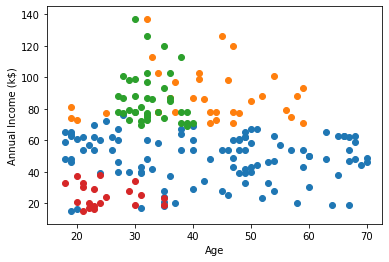

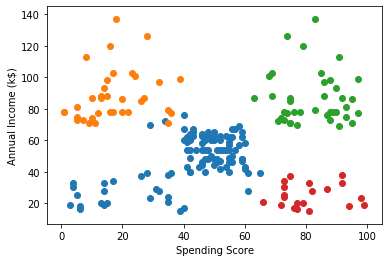

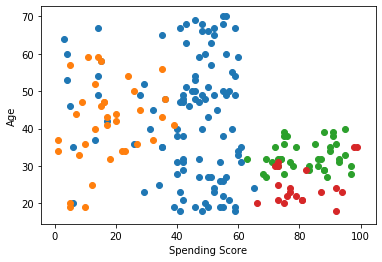

In [37]:
grouped = customer_shopping.groupby('Labels')
plt.figure()
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
for group in grouped.groups:
    df = grouped.get_group(group)
    plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.figure()
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')
for group in grouped.groups:
    df = grouped.get_group(group)
    plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.figure()
plt.xlabel('Spending Score')
plt.ylabel('Age')
for group in grouped.groups:
    df = grouped.get_group(group)
    plt.scatter(df['Spending Score (1-100)'], df['Age'])

**Question:** What do each of the clusters represent?

**Answer:** We have 4 clusters each of their features are mentioned below and also summarized in the table above

- Cluster with high-medium age, medium annual income and medium spending score. This most likely represents normal middle aged to older people that shop routinely
- Cluster with high-medium age, high annual income and low spending score. This most likely represents financially well-off middle-aged to older people
- Cluster with medium age, high annual income and high spending score. This most likely represents financially well-off middle aged people who shop a lot
- Cluster with low age, low annual income but high spending score. This most likely repretns young individuals who shop a lot